In [1]:
import os
import shutil
from PIL import Image
import numpy as np
from   torchvision.datasets import ImageFolder
from   torchvision import transforms
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import torch
import random
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras import models



In [ ]:
# Ruta de la carpeta principal que contiene las subcarpetas de imágenes
carpeta_principal = "C:/codigos/Trabajo_Final_IA/FaceShape Dataset/training_set"
subcarpetas = ["Heart", "Oblong", "Oval", "Round", "Square"]

# Función para cargar y verificar imágenes
def cargar_imagen(ruta):
    try:
        img = Image.open(ruta)
        img.verify()  # Verifica si la imagen está corrupta
        img = Image.open(ruta).convert("RGB")  # Convierte a RGB si está en otro modo
        return img
    except Exception as e:
        print(f"Imagen corrupta o no válida: {ruta}, error: {e}")
        return None

# Función para calcular un hash para detectar duplicados
def calcular_hash(imagen):
    arr = np.array(imagen).flatten()
    return hash(arr.tobytes())

# Procesar cada subcarpeta y actualizar las imágenes
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(carpeta_principal, subcarpeta)
    ruta_subcarpeta_temp = os.path.join(carpeta_principal, f"{subcarpeta}_temp")

    # Crear una carpeta temporal para almacenar imágenes procesadas
    os.makedirs(ruta_subcarpeta_temp, exist_ok=True)

    imagenes_procesadas = {}
    
    # Verifica que la subcarpeta exista antes de procesar
    if not os.path.exists(ruta_subcarpeta):
        print(f"La carpeta {ruta_subcarpeta} no existe.")
        continue

    for archivo in os.listdir(ruta_subcarpeta):
        ruta_imagen = os.path.join(ruta_subcarpeta, archivo)

        # Cargar y verificar la imagen
        imagen = cargar_imagen(ruta_imagen)
        if imagen is None:
            continue  # Saltar imágenes malas

        # Calcular hash para detectar duplicados
        hash_imagen = calcular_hash(imagen)

        if hash_imagen not in imagenes_procesadas:
            imagenes_procesadas[hash_imagen] = ruta_imagen
            # Guardar imagen única en la carpeta temporal
            imagen.save(os.path.join(ruta_subcarpeta_temp, archivo))
        else:
            print(f"Imagen duplicada encontrada y eliminada: {ruta_imagen}")

    # Eliminar la carpeta original y renombrar la temporal
    shutil.rmtree(ruta_subcarpeta)  # Elimina la carpeta original
    os.rename(ruta_subcarpeta_temp, ruta_subcarpeta)  # Renombra la carpeta temporal

    print(f"Carpeta {subcarpeta} actualizada con imágenes únicas y válidas.")

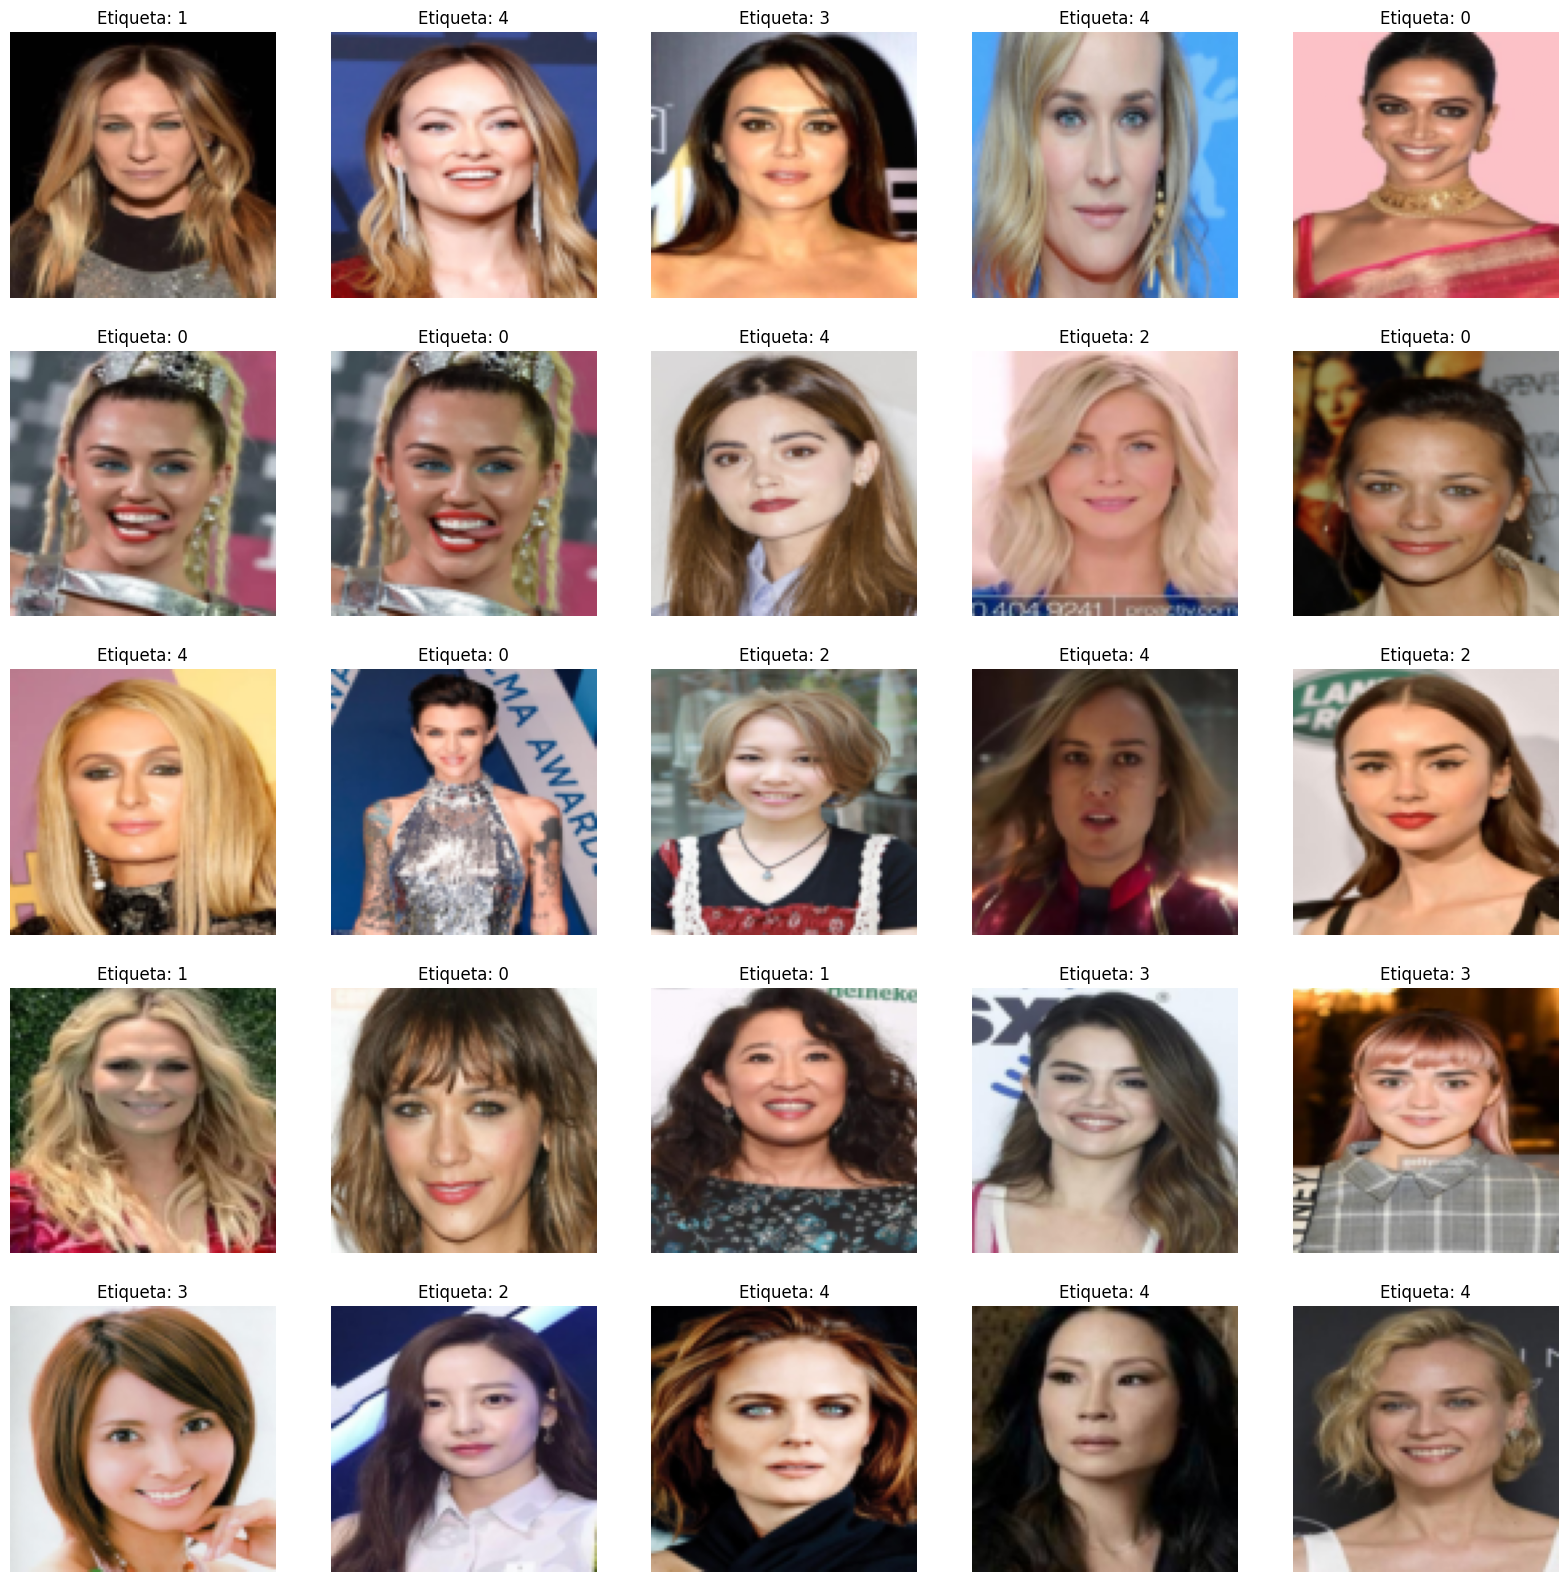

In [2]:
# Ruta a las carpetas
DATASET_TRAINING_DIR = "C:/codigos/TF_IA/FaceShape Dataset/training_set"
DATASET_TESTING_DIR = "C:/codigos/TF_IA/FaceShape Dataset/testing_set"

Tamanio_IMG=(100,100)
# Transformaciones para preprocesar las imágenes
transform = transforms.Compose([
    transforms.Resize(Tamanio_IMG),    # Redimensionar imágenes
    transforms.ToTensor(),
])
# Cargar el conjunto de datos con ImageFolder sin transformaciones
dataset = ImageFolder(root=DATASET_TRAINING_DIR,transform=transform)


# Lista para almacenar los pares (imagen, etiqueta)
datos_entrenamiento = []
for image, label in dataset:  # Iterar sobre todas las imágenes y etiquetas
    # Convertir tensor a NumPy y ajustar dimensiones
    image_np = image.numpy().transpose(1, 2, 0)  # De (1, 100, 100) a (100, 100, 1)
    datos_entrenamiento.append([image_np, label])
random.shuffle(datos_entrenamiento)
# Visualización opcional para verificar
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(datos_entrenamiento[i][0].squeeze())  # Remover dimensión extra para mostrar
    plt.title(f"Etiqueta: {datos_entrenamiento[i][1]}")
    plt.axis("off")
plt.show()




In [3]:
print('Size image: ' + str(image_np.shape))

Size image: (100, 100, 3)


In [4]:
datos_entrenamiento[0]

[array([[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        ...,
 
        [[0.19215687, 0.13725491, 0.1254902 ],
         [0.20392157, 0.14901961, 0.14117

In [5]:
len(datos_entrenamiento)

3994

In [6]:
x=[]
y=[]
for image_np,label in datos_entrenamiento:
    x.append(image_np)
    y.append(label)

In [11]:
x

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.19215687, 0.13725491, 0.1254902 ],
         [0.20392157, 0.14901961, 0.14117648]

In [10]:
y

array([1, 4, 3, ..., 4, 0, 1])

In [9]:
x=np.array(x)
y=np.array(y)

In [12]:
x.shape

(3994, 100, 100, 3)

In [30]:
# Modelo CNN con Dropout para 5 clases
modeloCNN2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Cambiado a 5 salidas
])


In [31]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y validación (25%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:

modeloCNN2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # O categorical_crossentropy si usas one-hot
                  metrics=['accuracy'])


historyCNN2 = modeloCNN2.fit(x_train, y_train, 
                              epochs=100, 
                              validation_data=(x_val, y_val), 
                              batch_size=32)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.2131 - loss: 1.6217 - val_accuracy: 0.2623 - val_loss: 1.5917
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.2891 - loss: 1.5547 - val_accuracy: 0.3453 - val_loss: 1.5254
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.3719 - loss: 1.4707 - val_accuracy: 0.3564 - val_loss: 1.4932
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.4190 - loss: 1.4130 - val_accuracy: 0.3544 - val_loss: 1.4866
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.4507 - loss: 1.3362 - val_accuracy: 0.3824 - val_loss: 1.4623
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.4894 - loss: 1.2553 - val_accuracy: 0.3884 - val_loss: 1.4352
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.5353 - loss: 1.1602 - val_accuracy: 0.4144 - val_loss: 1.4204
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.5890 - loss: 1.0549 - val_accuracy: 0.

In [34]:

models.save_model(modeloCNN2,'mimodelo.keras')

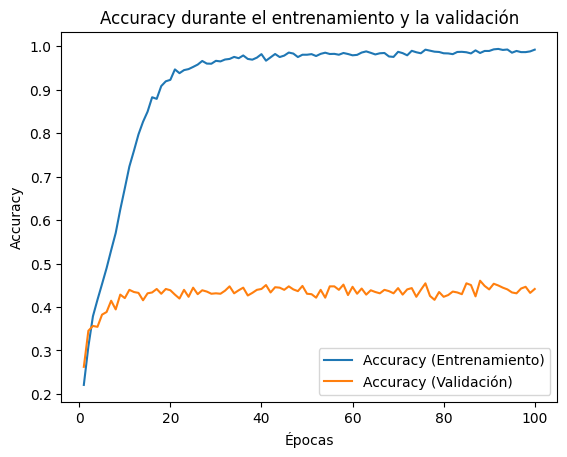

In [33]:
# Obtener las métricas de accuracy y val_accuracy
train_accuracy = historyCNN2.history['accuracy']
val_accuracy = historyCNN2.history['val_accuracy']

# Graficar las accuracies
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Accuracy (Entrenamiento)')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Accuracy (Validación)')
plt.title('Accuracy durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
model=models.load_model('mimodelo.keras')
my_image = cv2.imread('FaceShape Dataset/testing_set/Heart/heart (3).jpg')
my_image = cv2.resize(my_image,(100,100))
result=model.predict(np.array([my_image]))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0. 1. 0. 0. 0.]]
